# Wine Quality Classifier

<p><b>Status: <span style=color:orange;>In process</span></b></p>

##### LOAD THE FEATURE DATA

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('../../../data/preprocessed_data/X.csv', sep=',')

print ('Feature data, shape:\nX: {}'.format(X.shape))
X.head()

Feature data, shape:
X: (178, 13)


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


##### DATA OVERVIEW

In [2]:
y = pd.read_csv('../../../data/preprocessed_data/y.csv', sep=',')

print ('Target data, shape:\ny: {}'.format(X.shape))
y.head()

Target data, shape:
y: (178, 13)


,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


##### SPLIT THE DATA

In [3]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=13)

print('Data shapes:\n')
print('X_train : {}\ny_train : {}\n\nX_test : {}\ny_test : {}'.format(X_train.shape,
                                                                      y_train.shape,
                                                                      X_test.shape,
                                                                      y_test.shape))

Data shapes:

X_train : (142, 13)
y_train : (142, 3)

X_test : (36, 13)
y_test : (36, 3)


##### DEFINE NETWORK PARAMETERS

In [4]:
# define number of attributes
n_features = X_train.shape[1]    
n_classes = y_train.shape[1]

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features  # 11 neurons in input layer
n_layer_h1 = 50          # first   hidden layer
n_layer_h2 = 50          # second  hidden layer
n_layer_out = n_classes  # 7 neurons in input layer

sigma_init = 0.01   # For randomized initialization

##### MODEL ARCHITECTURE

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(42)

# define model architecture
model = Sequential()
model.add(Dense(n_layer_h1, activation='relu', input_shape=(n_features,)))
model.add(Dense(n_layer_h2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# add model's configuration
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# show model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 3,403
Trainable params: 3,403
Non-trainable params: 0
_________________________________________________________________


##### EXECUTE THE MODEL

In [6]:
from tensorflow.keras.callbacks import History 

# add history function to 
history = History()
model.fit(X_train, y_train, epochs=100, callbacks=[history])

Train on 142 samples
Epoch 1/100
142/142 [==============================] - 0s 2ms/sample - loss: 0.9222 - accuracy: 0.6268
Epoch 2/100
142/142 [==============================] - 0s 85us/sample - loss: 0.7264 - accuracy: 0.8873
Epoch 3/100
142/142 [==============================] - 0s 51us/sample - loss: 0.6071 - accuracy: 0.9085
Epoch 4/100
142/142 [==============================] - 0s 49us/sample - loss: 0.5090 - accuracy: 0.9507
Epoch 5/100
142/142 [==============================] - 0s 42us/sample - loss: 0.4284 - accuracy: 0.9507
Epoch 6/100
142/142 [==============================] - 0s 42us/sample - loss: 0.3603 - accuracy: 0.9648
Epoch 7/100
142/142 [==============================] - 0s 49us/sample - loss: 0.3036 - accuracy: 0.9648
Epoch 8/100
142/142 [==============================] - 0s 42us/sample - loss: 0.2563 - accuracy: 0.9718
Epoch 9/100
142/142 [==============================] - 0s 50us/sample - loss: 0.2164 - accuracy: 0.9718
Epoch 10/100
142/142 [======================

##### PRINTING RAW OUTPUT

In [7]:
predictions = model.predict(X_test)
predictions

array([[6.18082794e-08, 4.86137537e-07, 9.99999404e-01],
       [1.00000000e+00, 5.41202768e-18, 5.83957795e-14],
       [2.90871682e-09, 1.11198995e-12, 1.00000000e+00],
       [2.71583433e-16, 1.00000000e+00, 6.66609629e-21],
       [8.76038174e-13, 1.00000000e+00, 1.50062813e-15],
       [4.13026293e-18, 1.00000000e+00, 2.06882233e-20],
       [3.35717809e-09, 2.32890911e-11, 1.00000000e+00],
       [9.99999762e-01, 2.26656823e-07, 7.05404224e-09],
       [1.20098684e-15, 1.00000000e+00, 5.99717649e-18],
       [4.61413871e-15, 1.00000000e+00, 1.09210142e-16],
       [1.00000000e+00, 5.83274208e-18, 2.14362096e-16],
       [1.00000000e+00, 2.90192619e-18, 4.34108303e-16],
       [9.46763067e-12, 2.77316321e-12, 1.00000000e+00],
       [1.04668052e-15, 1.00000000e+00, 5.29266862e-19],
       [7.32703967e-11, 2.91392209e-15, 1.00000000e+00],
       [5.87633830e-10, 1.00000000e+00, 1.72057884e-13],
       [8.56595610e-13, 1.00000000e+00, 2.96880677e-14],
       [1.00000000e+00, 1.15227

##### EVALUATE TESTING SET

In [8]:
# Evaluate the model on the test data using `evaluate`
results = model.evaluate(X_test, y_test)

print('\nEvaluate on test data \n\n(loss), (accuracy) :\n{}'.format(results))

36/36 [==============================] - 0s 2ms/sample - loss: 0.1015 - accuracy: 0.9722

Evaluate on test data 

(loss), (accuracy) :
[0.10147557655970256, 0.9722222]


##### PRINTING RESULTS

In [9]:
dataframe = pd.DataFrame(np.argmax(predictions,1), columns=['Prediction'])
dataframe['Target'] = np.argmax(y_test, 1)
dataframe['Hit'] = np.equal(dataframe.Target, dataframe.Prediction)
print('\n\nPrinting results :\n\n', dataframe)



Printing results :

     Prediction  Target    Hit
0            2       2   True
1            0       0   True
2            2       2   True
3            1       1   True
4            1       1   True
5            1       1   True
6            2       2   True
7            0       0   True
8            1       1   True
9            1       1   True
10           0       0   True
11           0       0   True
12           2       2   True
13           1       1   True
14           2       2   True
15           1       1   True
16           1       1   True
17           0       0   True
18           0       0   True
19           2       1  False
20           2       2   True
21           1       1   True
22           0       0   True
23           0       0   True
24           2       2   True
25           1       1   True
26           2       2   True
27           1       1   True
28           0       0   True
29           2       2   True
30           1       1   True
31           1   

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


##### VISUALIZE THE RESULTS

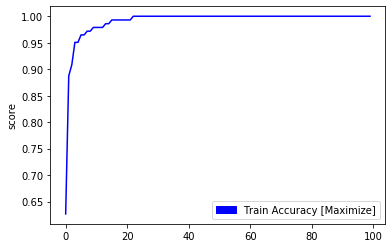

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set up legend
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy [Maximize]')
plt.legend(handles=[blue_patch])

#plot the data
plt.plot(history.history['accuracy'], color='blue')
plt.ylabel('score');

##### VISUALIZE THE LOSS EVOLUTION

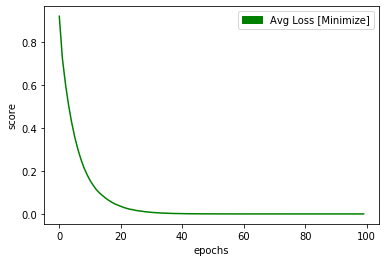

In [12]:
# set up legend
green_patch = mpatches.Patch(color='green', label='Avg Loss [Minimize]')
plt.legend(handles=[green_patch])

#plot the data
plt.plot(history.history['loss'], color='green')

plt.xlabel('epochs')
plt.ylabel('score');

##### SAVE MODEL FOR FUTURE RESTORE

In [13]:
import os

# create dir folders if they don't exits
os.makedirs('output/keras_checkpoints', exist_ok=True)

# save the trained model
model.save('output/keras_checkpoints/mlp_wine_tf_keras.h5')

##### LOAD PRETRAINED MODEL

In [14]:
model.load_weights('output/keras_checkpoints/mlp_wine_tf_keras.h5')

##### TESTING PRETRAINED MODEL

In [15]:
dataframe = pd.DataFrame(np.argmax(predictions,1), columns=['Prediction'])
dataframe['Target'] = np.argmax(y_test, 1)
dataframe['Hit'] = np.equal(dataframe.Target, dataframe.Prediction)
print('\n\nPrinting results :\n\n', dataframe)



Printing results :

     Prediction  Target    Hit
0            2       2   True
1            0       0   True
2            2       2   True
3            1       1   True
4            1       1   True
5            1       1   True
6            2       2   True
7            0       0   True
8            1       1   True
9            1       1   True
10           0       0   True
11           0       0   True
12           2       2   True
13           1       1   True
14           2       2   True
15           1       1   True
16           1       1   True
17           0       0   True
18           0       0   True
19           2       1  False
20           2       2   True
21           1       1   True
22           0       0   True
23           0       0   True
24           2       2   True
25           1       1   True
26           2       2   True
27           1       1   True
28           0       0   True
29           2       2   True
30           1       1   True
31           1   